In [8]:
%matplotlib inline

import xarray
import numpy
import matplotlib.pyplot as plt

In [ ]:
def multi_apply_along_axis(func1d, axis, arrs, *args, **kwargs):
    """
    Given a function `func1d(A, B, C, ..., *args, **kwargs)`  that acts on 
    multiple one dimensional arrays, apply that function to the N-dimensional
    arrays listed by `arrs` along axis `axis`
    
    If `arrs` are one dimensional this is equivalent to::
    
        func1d(*arrs, *args, **kwargs)
    
    If there is only one array in `arrs` this is equivalent to::
    
        numpy.apply_along_axis(func1d, axis, arrs[0], *args, **kwargs)
        
    All arrays in `arrs` must have compatible dimensions to be able to run
    `numpy.concatenate(arrs, axis)`
    
    Arguments:
        func1d:   Function that operates on `len(arrs)` 1 dimensional arrays,
                  with signature `f(*arrs, *args, **kwargs)`
        axis:     Axis of all `arrs` to apply the function along
        arrs:     Iterable of numpy arrays
        *args:    Passed to func1d after array arguments
        **kwargs: Passed to func1d as keyword arguments
    """
    # Concatenate the input arrays along the calculation axis to make one big
    # array that can be passed in to `apply_along_axis`
    carrs = numpy.concatenate(arrs, axis)
    
    # We'll need to split the concatenated arrays up before we apply `func1d`,
    # here's the offsets to split them back into the originals
    offsets=[]
    start=0
    for i in range(len(arrs)-1):
        start += arrs[i].shape[axis]
        offsets.append(start)
            
    # The helper closure splits up the concatenated array back into the components of `arrs`
    # and then runs `func1d` on them
    def helperfunc(a, *args, **kwargs):
        arrs = numpy.split(a, offsets)
        return func1d(*[*arrs, *args], **kwargs)
    
    # Run `apply_along_axis` along the concatenated array
    return numpy.apply_along_axis(helperfunc, axis, carrs, *args, **kwargs)

In [9]:
data_1 = xarray.open_rasterio('../data/prueba/pequena.tif')

print('Shape: ', data_1.variable.data.shape)
data_1.variable.data

Shape:  (6, 3687, 3705)


array([[[ 275.5,  260. ,  218. , ..., 1076. ,  999. ,  950.5],
        [ 325. ,  251. ,  264.5, ..., 1017. , 1002.5,  859. ],
        [ 278. ,  322. ,  262.5, ...,  961. ,  880.5,  801.5],
        ...,
        [ 562. ,  599. ,  553. , ..., 1085.5, 1022. , 1139. ],
        [ 541. ,  564. ,  568. , ...,  879.5,  782. ,  803. ],
        [ 495. ,  509. ,  566. , ...,  973. ,  869. ,  793. ]],

       [[ 181. ,  175.5,  155. , ..., 2120.5, 2009. , 1928. ],
        [ 205. ,  168.5,  178.5, ..., 2081. , 2016.5, 1807. ],
        [ 181. ,  185. ,  176. , ..., 2096. , 1915. , 1777. ],
        ...,
        [ 815. ,  884. ,  815. , ..., 1032. , 1271. , 2090.5],
        [ 807. ,  855. ,  866. , ..., 1507. , 1274. , 1364. ],
        [ 699. ,  782. ,  852. , ..., 1195. , 1026. , 1370. ]],

       [[ 213.5,  196.5,  153. , ..., 2378. , 2290. , 2236. ],
        [ 251. ,  196.5,  194.5, ..., 2366. , 2334.5, 2140. ],
        [ 204. ,  245. ,  195. , ..., 2306. , 2188.5, 2111.5],
        ...,
        [394

In [ ]:
r = numpy.dstack((data_1.values[0],data_1.values[1],data_1.values[2],data_1.values[3],data_1.values[4],data_1.values[5]))
print('Shape:', r.shape)
r

In [11]:
# numpy.concatenate(data_1.values[0],data_1.values[1],data_1.values[2],data_1.values[3],data_1.values[4],data_1.values[5], axis=0)
# numpy.concatenate(tuple(data_1.values)).shape
inv = numpy.transpose(data_1.values)
print('Shape:', inv.shape)
inv


Shape: (3705, 3687, 6)


array([[[ 275.5,  181. ,  213.5,  377. ,  215. ,  213.5],
        [ 325. ,  205. ,  251. ,  443. ,  254. ,  250. ],
        [ 278. ,  181. ,  204. ,  406. ,  209. ,  224. ],
        ...,
        [ 562. ,  815. , 3948. ,  227. ,  348. , 1914. ],
        [ 541. ,  807. , 4188. ,  214. ,  332. , 1986. ],
        [ 495. ,  699. , 4174. ,  202. ,  291. , 1816. ]],

       [[ 260. ,  175.5,  196.5,  372. ,  197. ,  209.5],
        [ 251. ,  168.5,  196.5,  367.5,  189. ,  202.5],
        [ 322. ,  185. ,  245. ,  405. ,  244. ,  233. ],
        ...,
        [ 599. ,  884. , 3969. ,  258. ,  377. , 1992. ],
        [ 564. ,  855. , 3996. ,  230. ,  375. , 2067. ],
        [ 509. ,  782. , 3999. ,  211. ,  323. , 1924. ]],

       [[ 218. ,  155. ,  153. ,  322. ,  157. ,  174. ],
        [ 264.5,  178.5,  194.5,  361. ,  196.5,  212. ],
        [ 262.5,  176. ,  195. ,  354.5,  202. ,  201.5],
        ...,
        [ 553. ,  815. , 4103. ,  230. ,  331. , 1931. ],
        [ 568. ,  866. , 4070

In [2]:
from keras.models import load_model
model = load_model("my_model.h5")

In [22]:
# model.predict([[[ 275.5,  181. ,  213.5,  377. ,  215. ,  213.5]]])
p = model.predict(inv[3704])
# inv[0]
p

array([[2.3219796e-40, 7.8052324e-43, 0.0000000e+00, 1.0000000e+00],
       [9.6975445e-39, 1.4858388e-40, 0.0000000e+00, 1.0000000e+00],
       [2.4166659e-38, 1.4031342e-40, 0.0000000e+00, 1.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.4012985e-45, 6.3559395e-40, 0.0000000e+00, 1.0000000e+00],
       [1.3858842e-42, 5.3563333e-38, 0.0000000e+00, 1.0000000e+00]],
      dtype=float32)

In [27]:
result = []
def compute():
    for i in range(0,inv.shape[0]):
        result.append(model.predict(inv[i]))

%time compute()

CPU times: user 30.5 s, sys: 61.3 ms, total: 30.6 s
Wall time: 30.6 s


In [35]:
ar = numpy.array(result)
ar.shape

(3705, 3687, 4)

In [38]:
l = numpy.argmax(ar,axis=2)
l.shape

(3705, 3687)

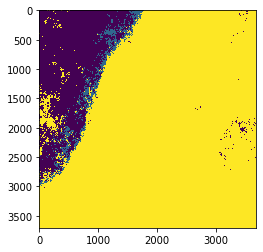

In [42]:
plt.imshow(l)

In [46]:
a = numpy.transpose(l)
a.shape

(3687, 3705)

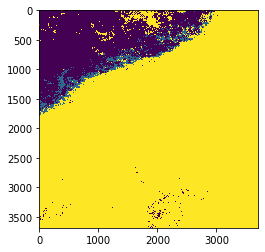

In [47]:
plt.imshow(a)

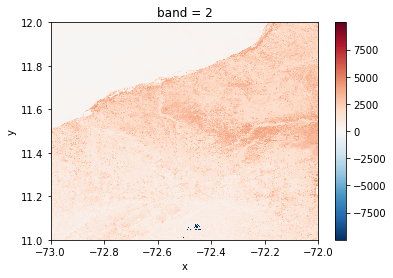

In [44]:
data_1[1].plot()

In [58]:
data_1[0].values = a
data_1[0].coords['y']

<xarray.DataArray 'y' (y: 3687)>
array([12.000094, 11.999823, 11.999552, ..., 11.000618, 11.000347, 11.000075])
Coordinates:
    band     int64 1
  * y        (y) float64 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 12.0 ...

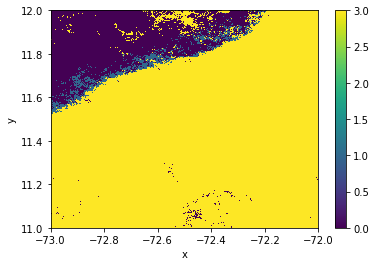

In [62]:
w= xarray.DataArray(data=a,coords={'x':data_1.coords['x'],'y':data_1.coords['y']},dims=('y','x'))
w.plot()

In [ ]:
def compute():
    result = numpy.zeros(shape=(inv.shape[0],inv.shape[1]))
    shape_i = inv.shape[0]
    shape_j = inv.shape[1]
    for i in range(shape_i):
        for j in range(shape_j):
#             result[i,j] = sum(inv[i][j])
            result[i,j] = numpy.argmax(model.predict([[ inv[i][j] ]]))
            
%time compute()

In [ ]:
%time numpy.apply_along_axis(sum, 0, data_1.variable.data)


In [ ]:
function = lambda args: numpy.argmax(model.predict([[ args ]]))

vf = numpy.vectorize(function)

In [ ]:
%time numpy.apply_along_axis(vf,0,data_1.variable.data,dtype=numpy.int16, shape=(1,))

In [ ]:
data_1.variable.data